# Two-Group Solution Guide

The tranverse buckling is: 0.00015747073175398043

The overall core cross section for the fast flux is: 0.02638883829298575
The overall core cross section for the thermal flux is: 0.12105579188026043
The overall reflector cross section for the fast flux is: 0.049577941926881995
The overall reflector cross section for the thermal flux is: 0.019725195317080637

The values of B2 are: [-0.363346651955821, 0.000771954624628694]

The fast flux in the core is: C1*exp(x*sqrt(-B^2_neg)) + C1*exp(-x*sqrt(-B^2_neg)) + C4*cos(sqrt(B^2_pos)*x)
The thermal flux in the core is: C5*exp(x*sqrt(-B^2_neg)) + C5*exp(-x*sqrt(-B^2_neg)) + C8*cos(sqrt(B^2_pos)*x)
The fast flux in the reflector is: C9*exp(-sqrt(Sigma_1r)*x/sqrt(D_1r))
The thermal flux in the reflector is: C10*exp(-sqrt(Sigma_2r)*x/sqrt(D_2r)) + C9*D_1r*Sigma_12r*exp(-sqrt(Sigma_1r)*x/sqrt(D_1r))/(D_1r*Sigma_2r - D_2r*Sigma_1r)

The 1° BC is: Eq(C1*exp(d*sqrt(-B^2_neg)/2) + C1*exp(-d*sqrt(-B^2_neg)/2) + C4*cos(sqrt(B^2_pos)*d/2), C9*exp(-sqrt(

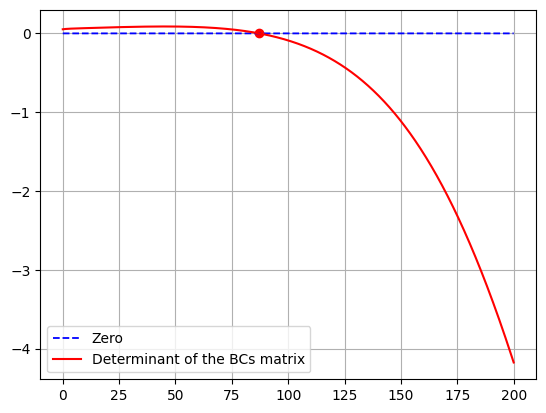

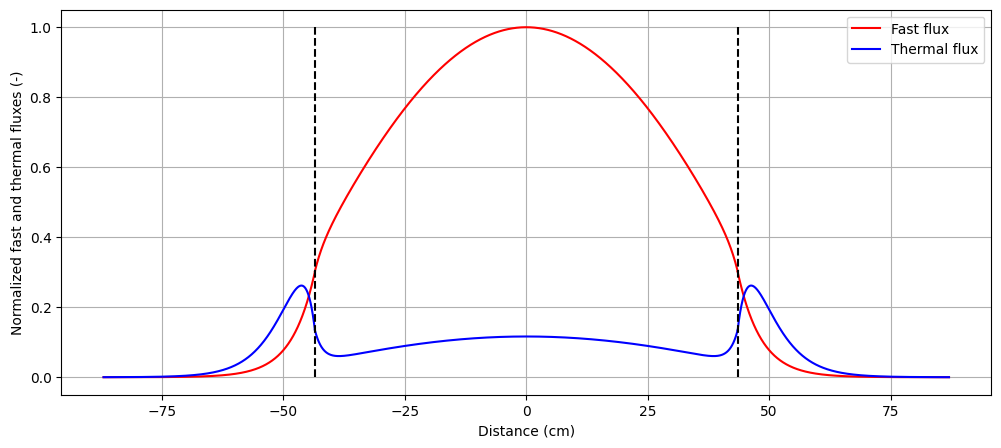

In [8]:
# Import the packages
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# C = core,
# R = reflector

nuSIGMAf = {         # 1/cm
    "1C": 0.008476,
    "2C": 0.18514
}

SIGMAa = {           # 1/cm
    "1C": 0.01207,
    "2C": 0.121,
    "1R": 0.0004,
    "2R": 0.0197
}

D = {                # cm
    "1C": 1.2627,
    "2C": 0.3543,
    "1R": 1.13,
    "2R": 0.16
}

SIGMAr = {           # = SIGMAa + SIGMA_outscattering (1/cm)
    "1C": 0.02619,
    "2C": 0.121,     # = SIGMAa[TC]
    "1R": 0.0494,
    "2R": 0.0197     # = SIGMAa[TR]
}

SIGMAs = {           # 1/cm
    '12C': SIGMAr['1C'] - SIGMAa['1C'],
    '12R': SIGMAr['1R'] - SIGMAa['1R']
}

y0 = 340             # cm
z0 = 370             # cm
delta = 0            # I neglect the extrapolation length
BT2 = (np.pi/(y0 + 2*delta))**2 + (np.pi/(z0 + 2*delta))**2
eps = 1.27

SIGMAo = {            # overall sigma, (1/cm)
    '1C': SIGMAa['1C'] + SIGMAs['12C'] + D['1C']*BT2,
    '2C': SIGMAa['2C'] + D['2C']*BT2,
    '1R': SIGMAa['1R'] + SIGMAs['12R'] + D['1R']*BT2,
    '2R': SIGMAa['2R'] + D['2R']*BT2
}

print('The tranverse buckling is: '+str(BT2)+'\n')
print('The overall core cross section for the fast flux is: '+str(SIGMAo['1C']))
print('The overall core cross section for the thermal flux is: '+str(SIGMAo['2C']))
print('The overall reflector cross section for the fast flux is: '+str(SIGMAo['1R']))
print('The overall reflector cross section for the thermal flux is: '+str(SIGMAo['2R']))

# Absorbing macroscopic cross sections
Sigma_1ac = sp.Symbol('Sigma_1ac', nonnegative=True, Real=True)
Sigma_2ac = sp.Symbol('Sigma_2ac', nonnegative=True, Real=True)
Sigma_1ar = sp.Symbol('Sigma_1ar', nonnegative=True, Real=True)
Sigma_2ar = sp.Symbol('Sigma_2ar', nonnegative=True, Real=True)

# Scattering macroscopic cross sections
Sigma_12c = sp.Symbol('Sigma_12c', nonnegative=True, Real=True)
Sigma_12r = sp.Symbol('Sigma_12r', nonnegative=True, Real=True)

# Diffusion coefficients
D_1c = sp.symbols('D_1c', nonnegative=True, Real=True)
D_2c = sp.Symbol('D_2c', nonnegative=True, Real=True)
D_1r = sp.Symbol('D_1r', nonnegative=True, Real=True)
D_2r = sp.Symbol('D_2r', nonnegative=True, Real=True)

# Parameters
epsilon = sp.Symbol('epsilon', nonnegative=True, Real=True)
nuSigma_f2 = sp.Symbol('nuSigma_f2', nonnegative=True, Real=True)
B2 = sp.Symbol('B^2', Real=True)

# Overall macroscopic cross sections
Sigma_1c = sp.Symbol('Sigma_1c', nonnegative=True, Real=True)
Sigma_2c = sp.Symbol('Sigma_2c', nonnegative=True, Real=True)
Sigma_1r = sp.Symbol('Sigma_1r', nonnegative=True, Real=True)
Sigma_2r = sp.Symbol('Sigma_2r', nonnegative=True, Real=True)

# System spatial coordinate
x = sp.Symbol('x', Real = True)

# Core diameter
d = sp.Symbol('d', Real = True, nonnegative=True)

# Fluxes constants
C1 = sp.Symbol('C1')
C2 = sp.Symbol('C2')
C3 = sp.Symbol('C3')
C4 = sp.Symbol('C4')
C5 = sp.Symbol('C5')
C6 = sp.Symbol('C6')
C7 = sp.Symbol('C7')
C8 = sp.Symbol('C8')
C9 = sp.Symbol('C9')
C10 = sp.Symbol('C10')
C11 = sp.Symbol('C11')

# Fluxes
phi_1c = sp.symbols('phi_1c', cls = sp.Function)
phi_2c = sp.symbols('phi_2c', cls = sp.Function)
phi_1r = sp.symbols('phi_1r', cls = sp.Function)
phi_2r = sp.symbols('phi_2r', cls = sp.Function)



# Core and reflector fluxes equations
EqC1 = sp.Eq(-D_1c*phi_1c(x).diff(x,2) + Sigma_1c*phi_1c(x), epsilon*nuSigma_f2*phi_2c(x))
EqC2 = sp.Eq(-D_2c*phi_2c(x).diff(x,2) + Sigma_2c*phi_2c(x), Sigma_12c*phi_1c(x))
EqR1 = sp.Eq(-D_1r*phi_1r(x).diff(x,2) + Sigma_1r*phi_1r(x), 0)
EqR2 = sp.Eq(-D_2r*phi_2r(x).diff(x,2) + Sigma_2r*phi_2r(x), Sigma_12r*phi_1r(x))

# First I analyze the core equations
EqC1 = EqC1.subs(phi_1c(x).diff(x,2), -B2*phi_1c(x))
EqC2 = EqC2.subs(phi_2c(x).diff(x,2), -B2*phi_2c(x))

# I convert these 2 linear algebraic equations in a matrix system
matrix_C1C2, b = sp.linear_eq_to_matrix([EqC1, EqC2], [phi_1c(x), phi_2c(x)])

# To avoid trivial solutions, I need to put the determinant of the matrix different from 0
Eq_in_B2 = sp.det(matrix_C1C2)
Eq_in_B2 = Eq_in_B2.subs(D_1c, D['1C']).subs(D_2c, D['2C']).subs(Sigma_1c, SIGMAo['1C']).subs(Sigma_2c, SIGMAo['2C']).subs(epsilon, eps).subs(nuSigma_f2, nuSIGMAf['2C']).subs(Sigma_12c, SIGMAs['12C'])

B2_values = sp.solve(Eq_in_B2, B2)
print('\nThe values of B2 are: '+str(B2_values))

# With B^2 I can find the shapes of phi_1c and phi_2c
EqBuckling = sp.Eq(phi_1c(x).diff(x,2) + B2*phi_1c(x), 0)

# I substitute the new symbols of B2 in the buckling equation considering its values
B2_neg = sp.Symbol('B^2_neg', Real=True, negative=True)
B2_pos = sp.Symbol('B^2_pos', Real=True, nonnegative=True)

if B2_values[0]<0:
  EqX = EqBuckling.subs(B2, B2_neg)
else:
  EqX = EqBuckling.subs(B2, B2_pos)

if B2_values[1]<0:
  EqY = EqBuckling.subs(B2, B2_neg)
else:
  EqY = EqBuckling.subs(B2, B2_pos)

# Now I have 2 equations that lead to 2 possible solutions of the buckling equations
# and so to 2 possible shapes of the fluxes: one sinusoidal and the other exponential
# (since B2 can be both positive and negative)
EqX = sp.dsolve(EqX, phi_1c(x))
EqY = sp.dsolve(EqY, phi_1c(x))

# I call the constants of X and Y differently
EqY1 = EqY.subs(C1, C3).subs(C2, C4)

EqX2 = EqX.subs(C1, C5).subs(C2, C6)
EqY2 = EqY.subs(C1, C7).subs(C2, C8)

# The fluxes in the core are given by a linear combination of X and Y
PHI_1c = EqX.rhs + EqY1.rhs
PHI_2c = EqX2.rhs + EqY2.rhs

# BC: the symmetry of core fluxes is obtained by imposing the simmetry of both X and Y
PHI_1c = PHI_1c.subs(C3, 0)      # so that the solution Y (found for B2>0) is symmetric (the constant in front of sin is put =0)
PHI_1c = PHI_1c.subs(C2, C1)     # so that the solution X (found for B2<0) is symmetric (the 2 exponentials have the same constant in front of them)

PHI_2c = PHI_2c.subs(C7, 0)
PHI_2c = PHI_2c.subs(C6, C5)

print('\nThe fast flux in the core is: '+str(PHI_1c))
print('The thermal flux in the core is: '+str(PHI_2c))

# Now I calculate the fluxes in the reflector directly from EqR1 since it is the only unknown there
PHI_1r = sp.dsolve(EqR1, phi_1r(x))

# BC: boundedness of phi_1r for x->oo:
PHI_1r = PHI_1r.subs(C2, 0)       # the constant in front of the positive exponential is put equal to zero
PHI_1r = PHI_1r.subs(C1, C9)      # I give a different name to the other constant

PHI_1r = PHI_1r.rhs
print('The fast flux in the reflector is: '+str(PHI_1r))

# Now I substitute the fast flux in the reflector in the last equation, so the thermal
# flux in the reflector is a linear combination of both both the homogeneous and the
# particular solutions
EqR2 = EqR2.subs(phi_1r(x), PHI_1r)
PHI_2r = sp.dsolve(EqR2, phi_2r(x))

# BC: boundedness of phi_2r for x->oo:
PHI_2r = PHI_2r.subs(C2, 0)
PHI_2r = PHI_2r.subs(C1, C10)

PHI_2r = PHI_2r.rhs
print('The thermal flux in the reflector is: '+str(PHI_2r))



# Now that I've found all the fluxes shapes, I use the remaining 4 BC and the 2 core
# equations to create a relationship among the last unknown 6 constants in order to
# get the criticality condition
dPHI_1c = sp.diff(PHI_1c, x)
dPHI_2c = sp.diff(PHI_2c, x)
dPHI_1r = sp.diff(PHI_1r, x)
dPHI_2r = sp.diff(PHI_2r, x)

d2PHI_1c = sp.diff(PHI_1c, x, 2)
d2PHI_2c = sp.diff(PHI_2c, x, 2)

# If I substitute the expressions of PHI_1c, PHI_2c in the 1° core equation and I impose
# that the coefficients in front of exp(x), cos(x) are equal from both sides of the
# equations, I obtain these 2 conditions over the system constants. These 2 conditions
# need to be satisfied for the 2 core equations to be valid for each value of x
ConstCondition1 = sp.Eq(C5, C1*((D_1c*B2_neg+Sigma_1c) / (epsilon*nuSigma_f2)))
ConstCondition2 = sp.Eq(C8, C4*((D_1c*B2_pos+Sigma_1c) / (epsilon*nuSigma_f2)))

# I get an expression for C5 and C8
C5_expression = ConstCondition1.rhs
C8_expression = ConstCondition2.rhs

# Now I introduce the 4 BC
BC1 = sp.Eq(PHI_1c, PHI_1r)
BC2 = sp.Eq(PHI_2c, PHI_2r)
BC3 = sp.Eq(-D_1c*dPHI_1c, -D_1r*dPHI_1r)
BC4 = sp.Eq(-D_2c*dPHI_2c, -D_2r*dPHI_2r)

# I substitute the 2 constants I've already found (C5, C8) thanks to the 2 ConstConditions
# in the 2° and 4° BCs, where C5 and C8 appear
BC2 = BC2.subs(C5, C5_expression).subs(C8, C8_expression)
BC4 = BC4.subs(C5, C5_expression).subs(C8, C8_expression)

# I substitute the values of x at which these BC are defined: d/2, the core radius
BC1 = BC1.subs(x, d/2)
BC2 = BC2.subs(x, d/2)
BC3 = BC3.subs(x, d/2)
BC4 = BC4.subs(x, d/2)

print('\nThe 1° BC is: '+str(BC1))
print('The 2° BC is: '+str(BC2))
print('The 3° BC is: '+str(BC3))
print('The 4° BC is: '+str(BC4))




# Now I can build a matrix from this linear system which must have a determinant
# equal to zero in order not to have trivial solution
A, b = sp.linear_eq_to_matrix([BC1, BC2, BC3, BC4], [C1, C4, C9, C10])

# I substitute the actual values of the parameters inside the matrix and then I turn
# them into rational numbers in order to simplify the computations
A = A.subs(D_1c, D['1C']).subs(D_2c, D['2C']).subs(D_1r, D['1R']).subs(D_2r, D['2R']).subs(Sigma_1c, SIGMAo['1C']).subs(Sigma_2c, SIGMAo['2C']).subs(epsilon, eps).subs(nuSigma_f2, nuSIGMAf['2C']).subs(Sigma_12c, SIGMAs['12C']).subs(Sigma_1r, SIGMAo['1R']).subs(Sigma_2r, SIGMAo['2R']).subs(Sigma_12r, SIGMAs['12R']).subs(B2_neg, B2_values[0]).subs(B2_pos, B2_values[1])

# Domain of x
dimensions = np.linspace(0, 200, 2000)

# I initialise the vector of the possible solutions for d and of the values of the
# determinant of A
Solutions = []
DetValues = []

# Tollerance for finding the solution
toll=1e-3

for ddd in dimensions:

  # The only unknown coefficient inside A is d. I take some of its possible values
  # and I verify the determinant obtained: if it is sufficiently close to 0, then
  # the guessed value of d may be correct
  AAA = sp.simplify(A.subs(d, ddd), rational=True)
  Criticality = sp.det(AAA)
  Criticality = Criticality.evalf()

  # I'm plotting the determinant values
  DetValues = np.append(DetValues, Criticality)

  if abs(Criticality) < toll:
    Solutions = np.append(Solutions, ddd)

# plot of the determinant values with d
plt.figure()
plt.plot(dimensions, np.zeros(len(dimensions)), color='blue', linewidth=1.3, linestyle='dashed')
plt.plot(dimensions, DetValues, color='red')
plt.legend(['Zero', 'Determinant of the BCs matrix'])
plt.grid()

print('\nThe possible core dimensions are: '+str(Solutions))

# I take into consideration only the solutions greater than 10 cm since the other are
# unphysical
d_exact = [i for i in Solutions if i>10]

# I take the first possible solution as the correct one
d_exact = d_exact[0]
plt.scatter(d_exact, 0, color='red')
print('The radius of the core is: '+str(d_exact/2)+' cm')



# Now I look for the constant real values
S0 = 1    # normalized value of the core fast flux, necessary to find the constants values
          # since the critical system is undetermined otherwise
FastFluxMax = sp.Eq(2*C1 + C4, S0)  # evaluated for x=0

# System to find C1, C4, C5, C8, C9, C10
System = [FastFluxMax, BC2, BC3, BC4, ConstCondition1, ConstCondition2]

# In order to simplify the computations for python, I substitute the numerical values
# and then I convert it into rational numbers
System = [eq.subs(d, d_exact).subs(D_1c, D['1C']).subs(D_2c, D['2C']).subs(D_1r, D['1R']).subs(D_2r, D['2R']).subs(Sigma_1c, SIGMAo['1C']).subs(Sigma_2c, SIGMAo['2C']).subs(epsilon, eps).subs(nuSigma_f2, nuSIGMAf['2C']).subs(Sigma_12c, SIGMAs['12C']).subs(Sigma_1r, SIGMAo['1R']).subs(Sigma_2r, SIGMAo['2R']).subs(Sigma_12r, SIGMAs['12R']).subs(B2_neg, B2_values[0]).subs(B2_pos, B2_values[1]) for eq in System]
System = [sp.nsimplify(eq, rational=True) for eq in System]

ConstExact = sp.solve(System, [C1, C4, C5, C8, C9, C10])

C1_exact = ConstExact[C1].evalf()
C4_exact = ConstExact[C4].evalf()
C5_exact = ConstExact[C5].evalf()
C8_exact = ConstExact[C8].evalf()
C9_exact = ConstExact[C9].evalf()
C10_exact = ConstExact[C10].evalf()

print('\nThe value of C1 is: '+str(C1_exact))
print('The value of C4 is: '+str(C4_exact))
print('The value of C5 is: '+str(C5_exact))
print('The value of C8 is: '+str(C8_exact))
print('The value of C9 is: '+str(C9_exact))
print('The value of C10 is: '+str(C10_exact))

# I substitute the constants values inside the fluxes expressions together with the
# other parameters
PHI_1c = PHI_1c.subs(C1, C1_exact).subs(C4, C4_exact).subs(B2_neg, B2_values[0]).subs(B2_pos, B2_values[1])
PHI_2c = PHI_2c.subs(C5, C5_exact).subs(C8, C8_exact).subs(B2_neg, B2_values[0]).subs(B2_pos, B2_values[1])
PHI_1r = PHI_1r.subs(C9, C9_exact).subs(Sigma_1r, SIGMAo['1R']).subs(D_1r, D['1R'])
PHI_2r = PHI_2r.subs(C9, C9_exact).subs(C10, C10_exact).subs(Sigma_1r, SIGMAo['1R']).subs(D_1r, D['1R']).subs(Sigma_2r, SIGMAo['2R']).subs(D_2r, D['2R']).subs(Sigma_12r, SIGMAs['12R'])

# Plot of the fluxes
x_core = np.linspace(-d_exact/2, d_exact/2, 2000)
x_refl_left = np.linspace(-d_exact, -d_exact/2, 1000)
x_refl_right = np.linspace(d_exact/2, d_exact, 1000)

PHI_1c = [PHI_1c.subs(x, i).evalf() for i in x_core]
PHI_2c = [PHI_2c.subs(x, i).evalf() for i in x_core]
PHI_1r = [PHI_1r.subs(x, i).evalf() for i in x_refl_right]
PHI_2r = [PHI_2r.subs(x, i).evalf() for i in x_refl_right]

plt.figure(figsize=(12,5))
plt.plot(x_core, PHI_1c, color='red')
plt.plot(x_core, PHI_2c, color='blue')
plt.plot(x_refl_right, PHI_1r, color='red')
plt.plot(x_refl_right, PHI_2r, color='blue')
plt.plot(x_refl_left, np.flip(PHI_1r), color='red')
plt.plot(x_refl_left, np.flip(PHI_2r), color='blue')
plt.vlines(x = [-d_exact/2, d_exact/2], ymax=max(PHI_1c), ymin=0, color = 'black', label = 'core radius', linestyle='dashed')
plt.legend(['Fast flux', 'Thermal flux'])
plt.ylabel('Normalized fast and thermal fluxes (-)')
plt.xlabel('Distance (cm)')
plt.grid()
